In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso

In [2]:
class CONFIG:
    INDEXS = ["R2 Pred", "R2", "EV", "ME", "MEAN_AE", "MSE", "MEDIAN_AE"]
    ALPHAS = [0.001 * 2 ** (n - 1) for n in range(1, 10)]
    N_SPLITS = 5

# Load Dataset

In [4]:
header = pd.read_csv("Dataset/header.csv", header=None)
header

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable


In [5]:
training_datasets = {}
for i in range(1, 6): 
    file = "Dataset/Training/Features_Variant_" + str(i) + ".csv"
    training_datasets[i] = pd.read_csv(file, header=None,
                               names=[header.iat[0, i] for i in range(0, 54)])
    

df = pd.concat([training_datasets[i] for i in range(1,6)])

print (df.shape)
df.head()
df.sample(10)

(602813, 54)


,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
11561,12548856,0,380664,9,16.0,185.0,50.750000,36.0,44.373650,0.0,...,0,0,0,0,0,0,0,1,0,5
32722,1181430,0,2307,17,0.0,41.0,4.196185,3.0,4.903948,0.0,...,0,0,0,0,0,1,0,0,0,0
77845,2046147,0,123685,9,0.0,1399.0,120.549784,71.0,156.274431,0.0,...,0,0,0,0,0,1,0,0,0,0
44321,101655,0,33,8,0.0,8.0,0.747989,0.0,1.538000,0.0,...,1,0,0,0,0,0,0,0,1,0
56230,99033,414,1053,32,0.0,217.0,7.537961,2.0,19.044450,0.0,...,0,0,0,0,1,0,0,0,0,2
1897,3440,0,164,28,0.0,32.0,5.137931,4.0,5.291877,0.0,...,1,0,0,0,0,0,0,0,1,0
99176,367390,0,2678,100,0.0,110.0,11.828175,6.0,15.430200,0.0,...,1,0,0,1,0,0,0,0,0,2
36077,82197,0,3788,14,0.0,40.0,7.944272,6.0,7.185080,0.0,...,0,0,1,0,0,0,0,0,0,1
11888,3544586,122388,227617,9,0.0,1546.0,144.377739,95.0,184.181892,0.0,...,0,1,0,1,0,0,0,0,0,0
118261,6751492,0,104226,9,0.0,1983.0,224.927928,122.0,315.694407,0.0,...,0,0,0,0,0,1,0,0,0,18


In [19]:
df.drop(["Derived15", "Derived25", "Post length"], axis = 1, inplace = True)

In [21]:
features = df.iloc[:, :50]
features

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,0,1
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,0,0,0,0,1
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,1,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199025,7170111,70,497000,9,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0,0,0,0,0,0,1,0,0,0
199026,7170111,70,497000,9,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0,0,0,0,0,0,1,0,0,0
199027,7170111,70,497000,9,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0,0,0,0,0,0,1,0,0,0
199028,7170111,70,497000,9,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
labels = df.iloc[:, -1:]
labels

,Target Variable
0,0
1,0
2,0
3,0
4,0
...,...
199025,203
199026,42
199027,51
199028,17


In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.3, random_state=42)

# Lasso

## Normalization

In [24]:
def normalize(X_train, X_test, y_train, y_test):
    x_scaler = StandardScaler()
    x_scaler.fit(X_train)
    X_train_norm = x_scaler.transform(X_train)
    X_test_norm = x_scaler.transform(X_test)
    y_scaler = StandardScaler()
    y_scaler.fit(y_train)
    y_train_norm = y_scaler.transform(y_train)
    y_test_norm = y_scaler.transform(y_test)
    return X_train_norm, X_test_norm, y_train_norm, y_test_norm

## K Fold Cross Validation

In [34]:
def k_flod_cross_validation(kf, alpha, features, labels):
     
    # Figure Config
    fig, axes = plt.subplots(1, CONFIG.N_SPLITS, figsize=(25, 4), sharex=True)
    plt.tight_layout()

    print("alpha: %s" % alpha)
    r2_preds, r2s, evs, mes, mean_aes, mses, median_aes = [], [], [], [], [], [], []
    for k, (train, test) in enumerate(kf.split(features, labels)):
        # Data Splitting
        X_train, X_test = features.iloc[train], features.iloc[test]
        y_train, y_test = labels.iloc[train], labels.iloc[test]
        
        # Normalization
        X_train_norm, X_test_norm, y_train_norm, y_test_norm = normalize(X_train, X_test, y_train, y_test)

        # Lasso
        model = Lasso(alpha=alpha, max_iter=1000)

        # Model Training
        predict = train_model(model, X_train_norm, y_train_norm, X_test_norm)
        plot_test_predict(y_train, y_test_norm, predict, axes, k)

        # Model Evaluation
        r2_pred, r2, ev, me, mean_ae, mse, median_ae = evaluate(model, y_train, X_test_norm, y_test_norm, predict)
        r2_preds.append(r2_pred)
        r2s.append(r2)
        evs.append(ev)
        mes.append(me)
        mean_aes.append(mean_ae)
        mses.append(mse)
        median_aes.append(median_ae)
    
    means = [np.mean(r2_preds), np.mean(r2s), np.mean(evs), np.mean(mes), 
             np.mean(mean_aes), np.mean(mses), np.mean(median_aes)]
    results = pd.DataFrame({
        "Index": CONFIG.INDEXS, 
        "Mean": means
    })
    print(results)

    plt.show()
    print("-----------------------------------------------------------------")
    
    return means

## Model Training

In [26]:
def train_model(model, X_train_norm, y_train_norm, X_test_norm):
    model.fit(X_train_norm, y_train_norm.ravel())
    predict = model.predict(X_test_norm)
    return predict

In [27]:
def plot_test_predict(y_train, y_test_norm, predict, axes=None, k=None):
    y_scaler = StandardScaler()
    y_scaler.fit(y_train)
    test_predict = pd.concat(
        [pd.DataFrame(y_scaler.inverse_transform(y_test_norm)),
         pd.DataFrame(y_scaler.inverse_transform(predict.reshape(-1, 1)))
        ], axis=1)
    headers =  ["Test", "Predict"]
    test_predict.columns = headers
    if axes is not None and k is not None:
        sns.lineplot(data=test_predict.sample(n=50), ax=axes[k]).set_title("k = " + str(k))
    else:
        sns.lineplot(data=test_predict.sample(n=50))

## Model Evaluation

In [28]:
def evaluate(model, y_train, X_test_norm, y_test_norm, predict):
    y_scaler = StandardScaler()
    y_scaler.fit(y_train)
    
    # R-Squared Prediction
    r2_pred = model.score(X_test_norm, y_test_norm)
    
    # R-Squared
    r2 = r2_score(y_scaler.inverse_transform(y_test_norm),
                  y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Explained Variance Score
    ev = explained_variance_score(y_scaler.inverse_transform(y_test_norm),
                                  y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Max Error
    me = max_error(y_scaler.inverse_transform(y_test_norm), 
                   y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Mean Absolute Error
    mean_ae = mean_absolute_error(y_scaler.inverse_transform(y_test_norm),
                                  y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Mean Squared Error
    mse = mean_squared_error(y_scaler.inverse_transform(y_test_norm),
                             y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Median Absolute Error
    median_ae = median_absolute_error(y_scaler.inverse_transform(y_test_norm), 
                                      y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    return r2_pred, r2, ev, me, mean_ae, mse, median_ae

## Hyperparameter Selection

In [29]:
def select_hyperparam():
    # K Fold Cross Validation
    kf = KFold(shuffle=True, random_state=42, n_splits=CONFIG.N_SPLITS)
    
    results = []
    for alpha in CONFIG.ALPHAS:
        means = k_flod_cross_validation(kf, alpha, X_train, y_train)
        results.append(means)

    df_evals = pd.DataFrame(np.array(results).transpose(), columns=CONFIG.ALPHAS, index=CONFIG.INDEXS)
    print(df_evals)

    compare_evals = []
    for index in CONFIG.INDEXS:
        if index == "R2 Pred" or index == "R2" or index == "EV":
            compare_evals.append(df_evals.transpose()[index].idxmax())
        else:
            compare_evals.append(df_evals.transpose()[index].idxmin())
    print(pd.DataFrame([compare_evals], columns=CONFIG.INDEXS, index=["Index"]))

alpha: 0.001
       Index         Mean
0    R2 Pred     0.324003
1         R2     0.324003
2         EV     0.324014
3         ME  1696.307402
4    MEAN_AE     8.028794
5        MSE   821.940446
6  MEDIAN_AE     3.971522


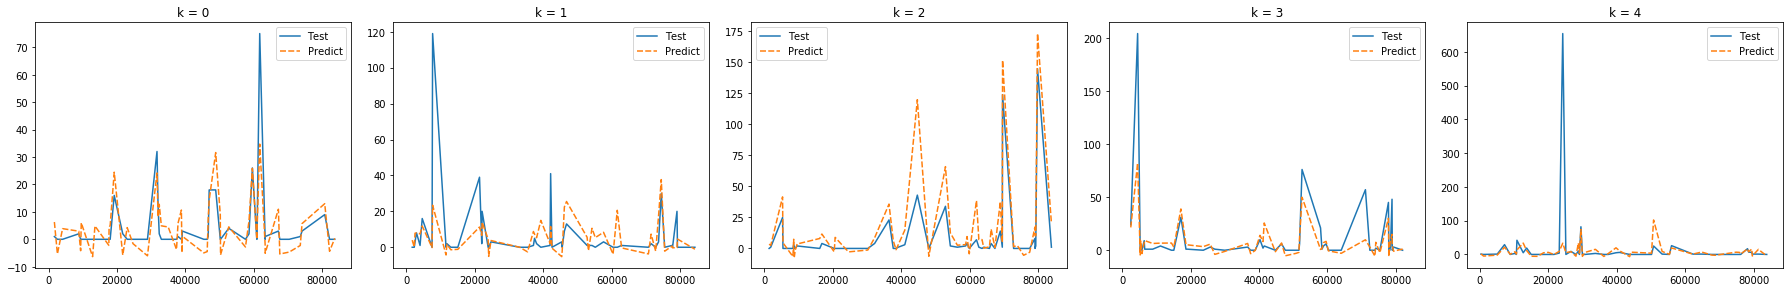

-----------------------------------------------------------------
alpha: 0.002
       Index         Mean
0    R2 Pred     0.323772
1         R2     0.323772
2         EV     0.323783
3         ME  1697.331385
4    MEAN_AE     7.998158
5        MSE   822.227041
6  MEDIAN_AE     3.957986


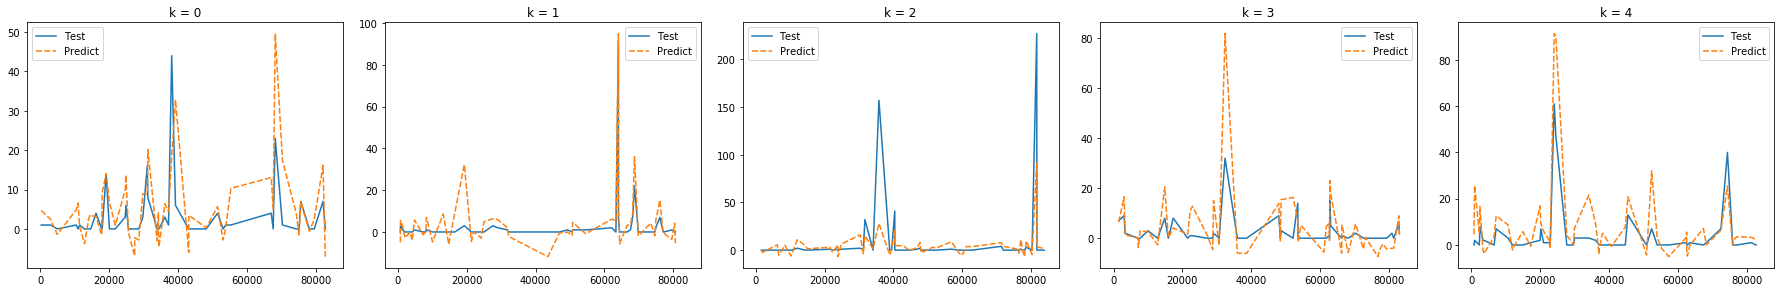

-----------------------------------------------------------------
alpha: 0.004
       Index         Mean
0    R2 Pred     0.323361
1         R2     0.323361
2         EV     0.323372
3         ME  1700.007378
4    MEAN_AE     7.942420
5        MSE   822.733705
6  MEDIAN_AE     3.925369


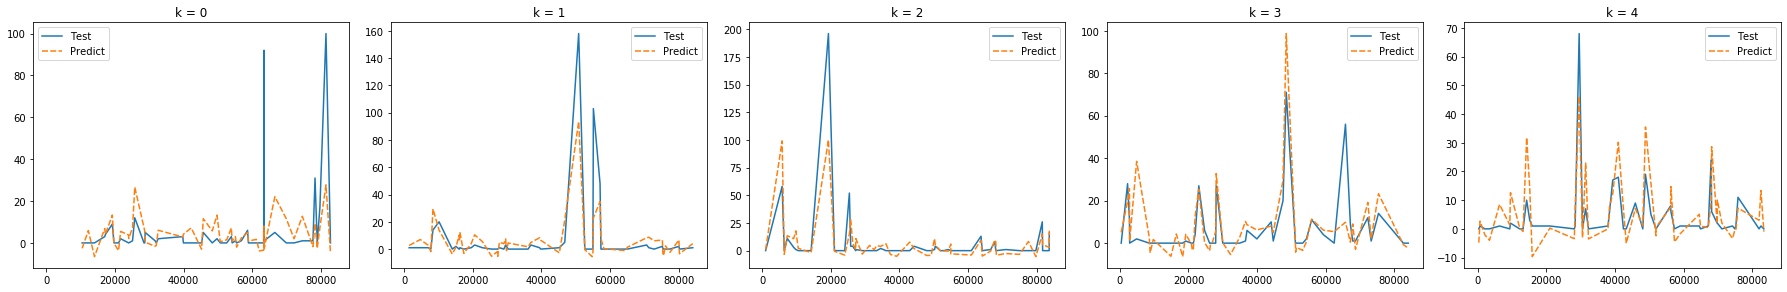

-----------------------------------------------------------------
alpha: 0.008
       Index         Mean
0    R2 Pred     0.321644
1         R2     0.321644
2         EV     0.321655
3         ME  1708.119131
4    MEAN_AE     7.869431
5        MSE   824.831342
6  MEDIAN_AE     3.884869


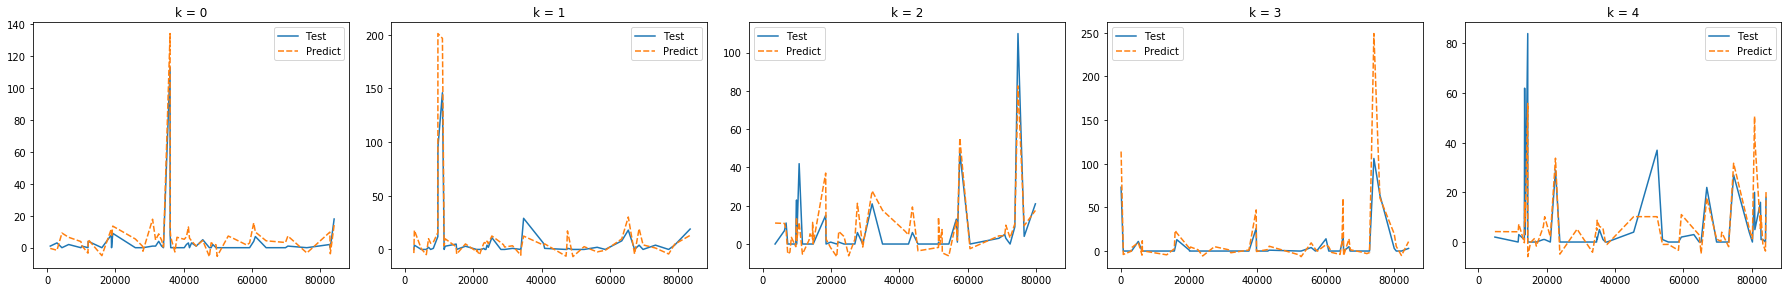

-----------------------------------------------------------------
alpha: 0.016
       Index         Mean
0    R2 Pred     0.320151
1         R2     0.320151
2         EV     0.320162
3         ME  1716.717720
4    MEAN_AE     7.683781
5        MSE   826.663300
6  MEDIAN_AE     3.679025


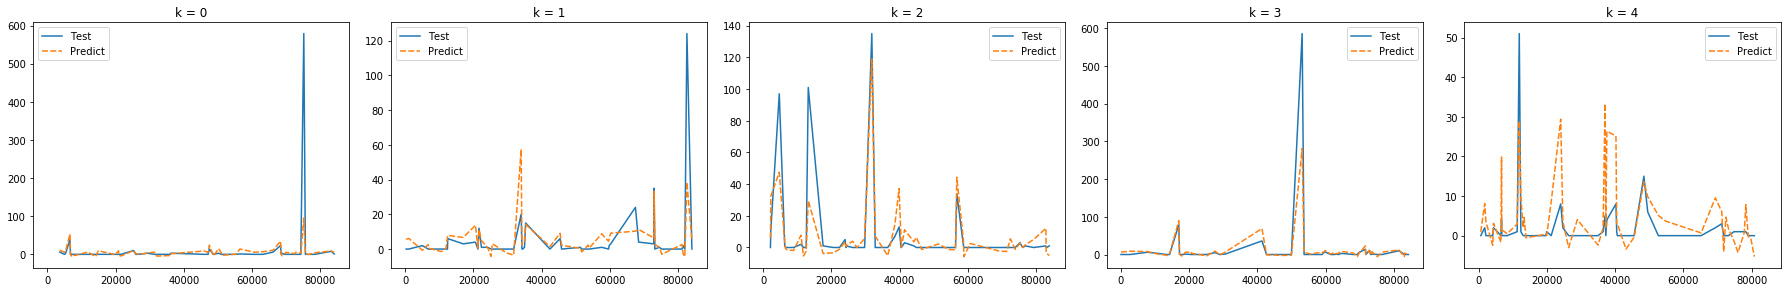

-----------------------------------------------------------------
alpha: 0.032
       Index         Mean
0    R2 Pred     0.317007
1         R2     0.317007
2         EV     0.317018
3         ME  1728.207656
4    MEAN_AE     7.353675
5        MSE   830.519234
6  MEDIAN_AE     3.273522


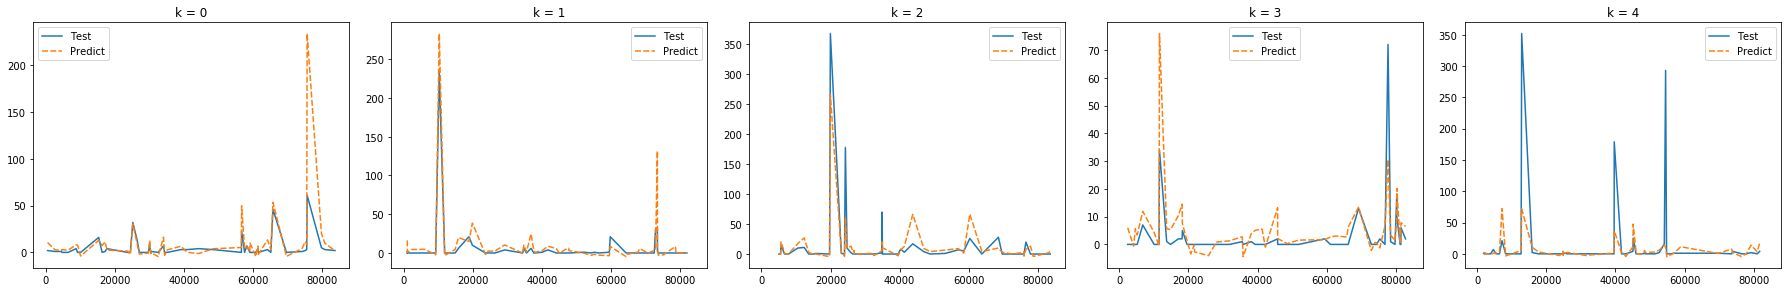

-----------------------------------------------------------------
alpha: 0.064
       Index         Mean
0    R2 Pred     0.306976
1         R2     0.306976
2         EV     0.306989
3         ME  1748.957429
4    MEAN_AE     6.831649
5        MSE   842.792179
6  MEDIAN_AE     2.565498


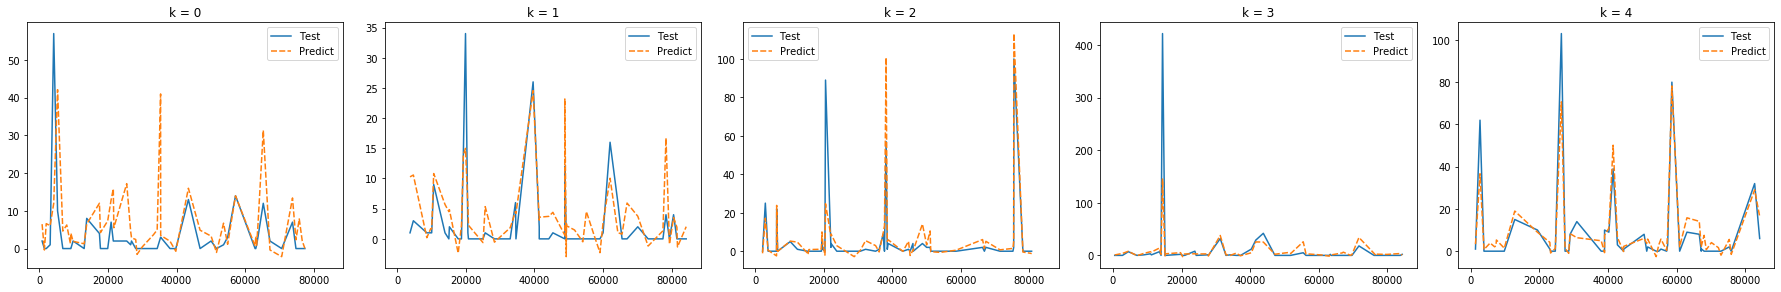

-----------------------------------------------------------------
alpha: 0.128
       Index         Mean
0    R2 Pred     0.277097
1         R2     0.277097
2         EV     0.277112
3         ME  1775.913201
4    MEAN_AE     6.941558
5        MSE   879.253999
6  MEDIAN_AE     2.732624


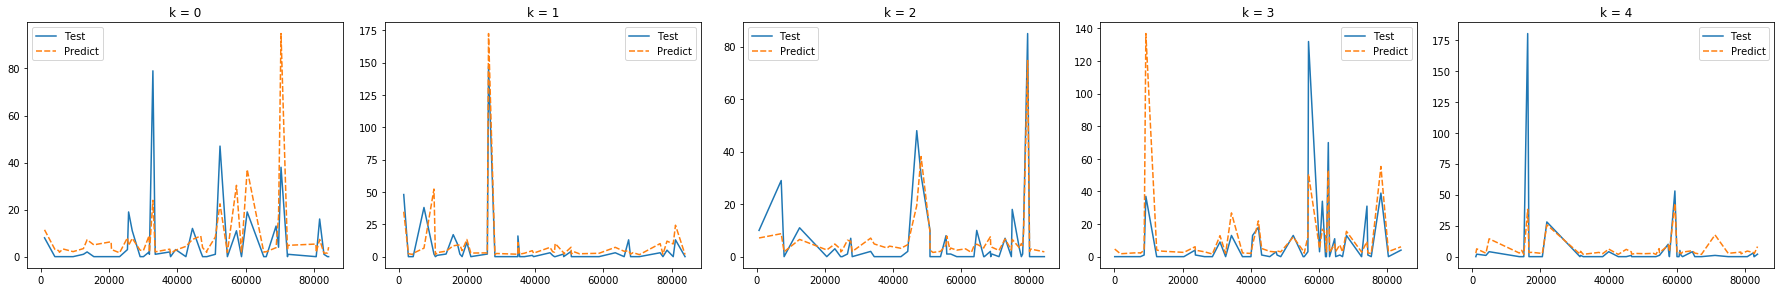

-----------------------------------------------------------------
alpha: 0.256
       Index         Mean
0    R2 Pred     0.215628
1         R2     0.215628
2         EV     0.215645
3         ME  1799.334771
4    MEAN_AE     8.009986
5        MSE   954.297299
6  MEDIAN_AE     4.379603


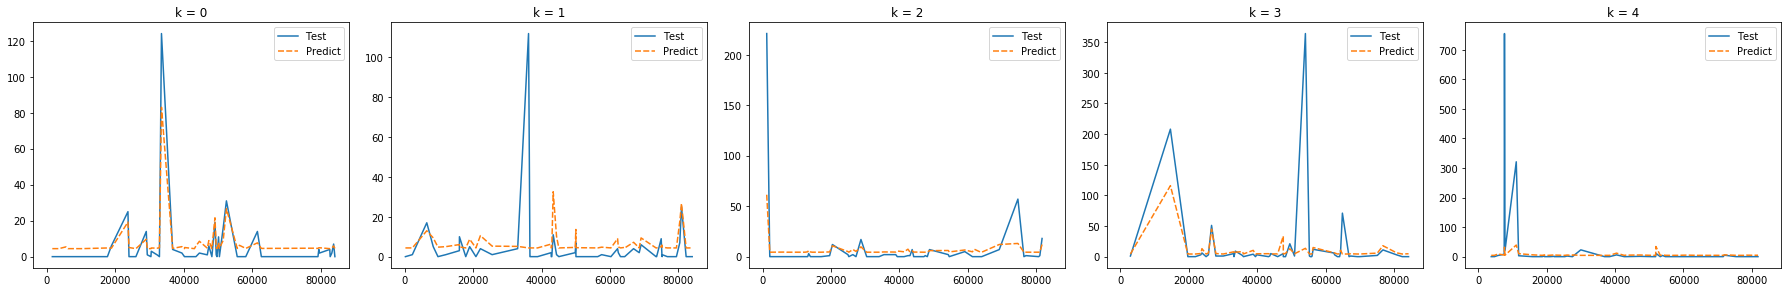

-----------------------------------------------------------------
                 0.001        0.002        0.004        0.008        0.016  \
R2 Pred       0.324003     0.323772     0.323361     0.321644     0.320151   
R2            0.324003     0.323772     0.323361     0.321644     0.320151   
EV            0.324014     0.323783     0.323372     0.321655     0.320162   
ME         1696.307402  1697.331385  1700.007378  1708.119131  1716.717720   
MEAN_AE       8.028794     7.998158     7.942420     7.869431     7.683781   
MSE         821.940446   822.227041   822.733705   824.831342   826.663300   
MEDIAN_AE     3.971522     3.957986     3.925369     3.884869     3.679025   

                 0.032        0.064        0.128        0.256  
R2 Pred       0.317007     0.306976     0.277097     0.215628  
R2            0.317007     0.306976     0.277097     0.215628  
EV            0.317018     0.306989     0.277112     0.215645  
ME         1728.207656  1748.957429  1775.913201  179

In [30]:
select_hyperparam()

## Learning Curve

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [31]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    plt.show()

## Todo: Validation Curve

https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html

## Final Model

In [35]:
def train_final_model():
    # Normalization
    X_train_norm, X_test_norm, y_train_norm, y_test_norm = normalize(X_train, X_test, y_train, y_test)

    # Lasso
    model = Lasso(alpha=0.001, max_iter=10000)

    # Model Training
    predict = train_model(model, X_train_norm, y_train_norm, X_test_norm)
    plot_learning_curve(model, "Learning Curve", X_train_norm, y_train_norm)
    plot_test_predict(y_train, y_test_norm, predict)

    # Model Evaluation
    r2_pred, r2, ev, me, mean_ae, mse, median_ae = evaluate(model, y_train, X_test_norm, y_test_norm, predict)

    results = pd.DataFrame({
        "Index": CONFIG.INDEXS, 
        "Mean": [r2_pred, r2, ev, me, mean_ae, mse, median_ae]
    })
    print(results)

In [ ]:
train_final_model()